# Problem Description

Image Classification on Cifar-10 dataset

CIFAR-10 is a dataset that consists of several images that are divided into 10 classes: 
1. Airplanes
2. Cars 
3. Birds
4. Cats
5. Deer
6. Dogs
7. Frogs
8. Horses
9. Ships
10.Trucks

The dataset consists of 60,000 32x32 color images and 6,000 images from each class. 
Images have low resolution (32x32)
Link to Dataset : https://www.cs.toronto.edu/~kriz/cifar.html


# Import Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [78]:
X_train.shape

(50000, 32, 32, 3)

In [79]:
X_test.shape

(10000, 32, 32, 3)

In [80]:
y_train.shape

(50000, 1)

In [81]:
y_test.shape

(10000, 1)

# Visualize Data

[8]


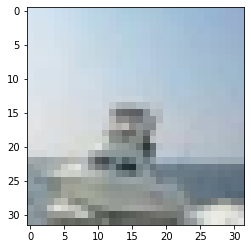

In [82]:
i = 100
plt.imshow(X_train[i])
print(y_train[i])


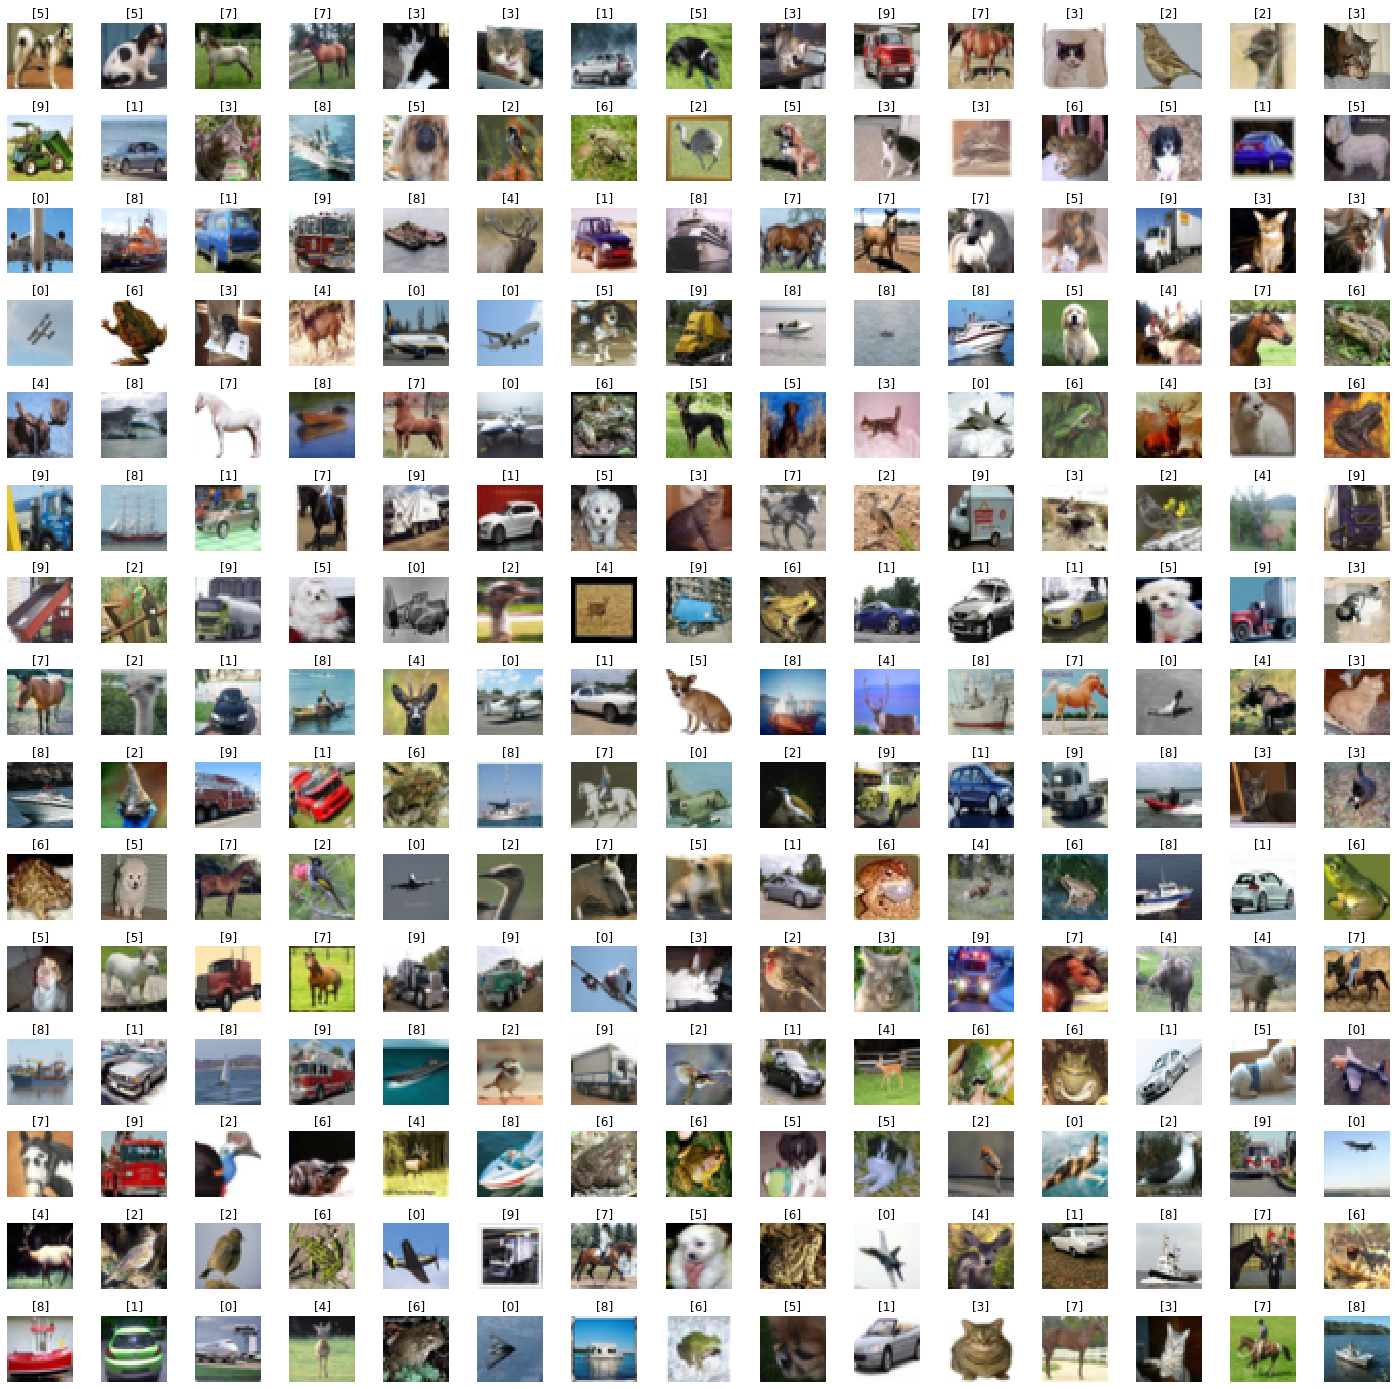

In [83]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training) # to pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# Data Preparation

In [84]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [85]:
number_cat = 10

In [86]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [87]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [88]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [89]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [90]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

# Normalizing the data

In [91]:
X_train = X_train/255
X_test = X_test/255

In [92]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [93]:
X_train.shape

(50000, 32, 32, 3)

In [94]:
Input_shape = X_train.shape[1:]

In [95]:
Input_shape

(32, 32, 3)

In [96]:
y_test.shape

(10000, 10)

# Train the Model

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [25]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 223s 4ms/step - loss: 1.5645 - acc: 0.4355
Epoch 2/10
50000/50000 [==============================] - 253s 5ms/step - loss: 1.1639 - acc: 0.5905
Epoch 3/10
50000/50000 [==============================] - 240s 5ms/step - loss: 1.0277 - acc: 0.6454
Epoch 4/10
50000/50000 [==============================] - 222s 4ms/step - loss: 0.9742 - acc: 0.6675
Epoch 5/10
50000/50000 [==============================] - 236s 5ms/step - loss: 0.9328 - acc: 0.6859
Epoch 6/10
50000/50000 [==============================] - 227s 5ms/step - loss: 0.9224 - acc: 0.6899
Epoch 7/10
50000/50000 [==============================] - 231s 5ms/step - loss: 0.9044 - acc: 0.6991
Epoch 8/10
50000/50000 [==============================] - 224s 4ms/step - loss: 0.8937 - acc: 0.7042
Epoch 9/10
50000/50000 [==============================] - 271s 5ms/step - loss: 0.8899 - acc: 0.7040
Epoch 10/10
50000/50000 [==================

# Evaluating the Model

In [26]:
evaluation = cnn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 11s 1ms/step


In [27]:
print('Test Accuracy is :', (evaluation[1]))

Test Accuracy is : 0.7019


In [28]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 0, 7])

In [29]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [30]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [31]:
y_test.shape

(10000,)

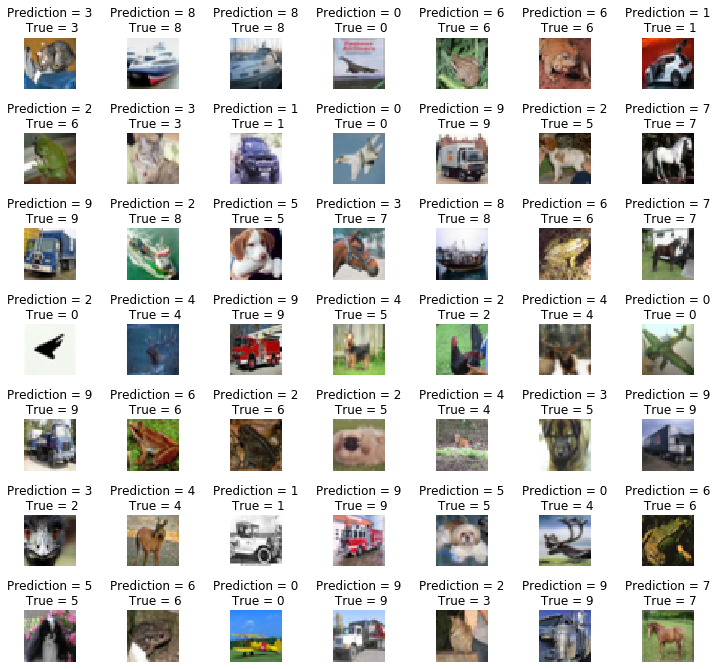

In [32]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [34]:
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[838,  12,  75,  14,  15,   0,   3,   2,  37,   4],
       [ 36, 884,  10,   7,   6,   2,   4,   0,  24,  27],
       [ 75,   0, 761,  46,  84,   6,  17,   4,   6,   1],
       [ 44,   2, 194, 575,  87,  21,  43,  12,  17,   5],
       [ 28,   1, 106,  42, 780,   2,  16,  19,   6,   0],
       [ 16,   1, 220, 310,  71, 325,  20,  26,   6,   5],
       [ 13,   2, 186,  62,  75,   1, 649,   1,  11,   0],
       [ 30,   1, 125,  58, 102,  13,   2, 660,   4,   5],
       [110,  17,  26,   7,   9,   0,   1,   0, 819,  11],
       [ 70, 113,  21,  18,  10,   0,   0,   5,  35, 728]])

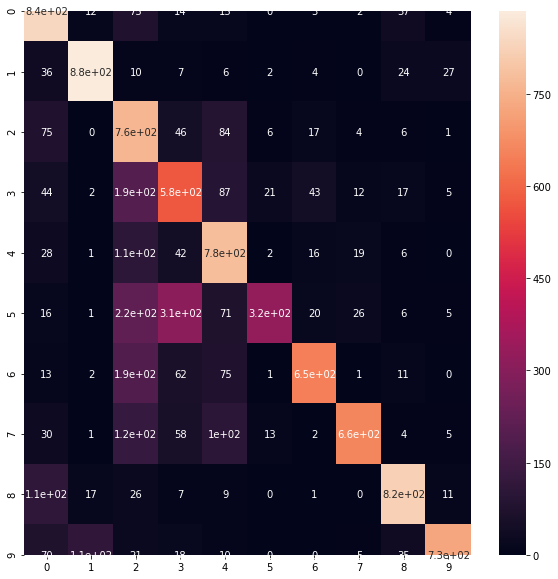

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

# Saving the Model

In [36]:
import os
cnn_model.save('Cifar_10_trained_model.h5')

# Training the Model using Augmented Training Data

What is Image Augmentation ?

Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
Augmentations also include shifting and changing the brightness of the images.

In [67]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [68]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [97]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 90,
                             width_shift_range = 0.1,
                             horizontal_flip = True,
                             vertical_flip = True
                             
                            )

In [98]:
datagen.fit(X_train)

In [99]:
X_train.shape

(50000, 32, 32, 3)

In [100]:
y_train.shape

(50000, 10)

In [101]:
X_test.shape

(10000, 32, 32, 3)

In [102]:
y_test.shape

(10000, 10)

In [103]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 10, steps_per_epoch = 50000/32)

Epoch 1/10
1563/1562 [==============================] - 254s 163ms/step - loss: 1.7141 - acc: 0.3832
Epoch 2/10
1563/1562 [==============================] - 235s 151ms/step - loss: 1.6109 - acc: 0.4227
Epoch 3/10
1563/1562 [==============================] - 250s 160ms/step - loss: 1.5745 - acc: 0.4379
Epoch 4/10
1563/1562 [==============================] - 235s 151ms/step - loss: 1.5523 - acc: 0.4478
Epoch 5/10
1563/1562 [==============================] - 228s 146ms/step - loss: 1.5341 - acc: 0.4585
Epoch 6/10
1563/1562 [==============================] - 276s 177ms/step - loss: 1.5162 - acc: 0.4660
Epoch 7/10
1563/1562 [==============================] - 238s 152ms/step - loss: 1.5051 - acc: 0.4665
Epoch 8/10
1563/1562 [==============================] - 240s 153ms/step - loss: 1.4923 - acc: 0.4745
Epoch 9/10
1563/1562 [==============================] - 226s 145ms/step - loss: 1.4877 - acc: 0.4778
Epoch 10/10
1563/1562 [==============================] - 230s 147ms/step - loss: 1.4756 - a

In [104]:
score = cnn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 11s 1ms/step


In [105]:
print('Test accuracy', score[1])

Test accuracy 0.4679


In [106]:
cnn_model.save('Cifar_10_Augmented_training_Model.h5')